# New York Airbnb Data

This analysis shows prediction optimization via various machine learning technuiqes found in the sklearn module. First various visualizations will be displayed. Next, basic linear regrssion will be shown and last, a grid search fiunction will be created. Data shown below can be downloaded from Kaggle.

[New York Air bnb](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

## Business Understanding 

New York is a top touring destination. Individuals usually know where to price homes according to location and size, however, occasionally, outliers arize. The business would like to find a way highlight these outliers and reach out to them to have discussions regarding pricing. This would allow the business to have a smaller price team
#### Questions to be answered with regards to the airbnb data
* What is the distirbution of the prices? 
* What items are heavily coorelated with pricing?
* Is linear regression plausable? What needs to change to make it plausible?
* Which predictor will highlight the outliers?

## Data Understanding
#### Questions for data understanding
* what are the data types?
* What What fields are clean and what fields need to be clean?
* What are the important fields to keep in the analysis?



In [97]:
# import needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# Read in the data for airbnb NYC data
df = pd.read_csv('./AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [98]:
# Data Types
df.dtypes
# Looks like there are quite a few catigorizations mixed with numeric data

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [99]:
# shows basic metrics for numeric items
df.describe()
# for now we will keep all fields, but in the future we will look at the coorelations

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Null analysis

Null analysis is required to find holes in the data, First an analysis of the null data fields will be highligthed. Once the null values are found, a strategy for the nulls will be found. 

In [100]:
# field with null values
np.sum(np.sum(df.isnull())/df.shape[0]== 0 )

12

In [101]:
#Proportion of null values 
np.sum(df.isnull())/df.shape[0]


id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

## Data Preparation

The catigorical data need to be changed to numeric. Data that causes overfitting needs to be removed. Numeric data needs to be normalized. null values will be removed. The mean() method will be used because it is a simple solution that takes the average into consideration. 

In [102]:
#These items could cause overfitting so they will be removed
df = df.drop(['last_review','host_id', 'id', 'name', 'host_name'], axis = 1) 

In [103]:
# null values will be taken care of. The 
df['reviews_per_month'].fillna((df['reviews_per_month'].mean()), inplace=True)


In [104]:
# this shows the null values are removed
np.sum(df.isnull())/df.shape[0]



neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [108]:
# normalizing all of the integer data
norm_df = df.select_dtypes(include=["int", "float"])
norm_columns = norm_df.columns
def normalize(df):
    result = df.copy()
    norm_df = df.select_dtypes(include=["int", "float"])
    for feature_name in norm_df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        df = pd.concat([df.drop(feature_name, axis = 1), result[feature_name]], axis=1)


    return result
df = normalize(df)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,0.357393,0.511921,Private room,0.0149,0.000000,0.014308,0.003419,0.015337,1.000000
1,Manhattan,Midtown,0.614199,0.490469,Entire home/apt,0.0225,0.000000,0.071542,0.006326,0.003067,0.972603
2,Manhattan,Harlem,0.748252,0.569257,Private room,0.0150,0.001601,0.000000,0.023307,0.000000,1.000000
3,Brooklyn,Clinton Hill,0.448496,0.535649,Entire home/apt,0.0089,0.000000,0.429253,0.079159,0.000000,0.531507
4,Manhattan,East Harlem,0.722820,0.565324,Entire home/apt,0.0080,0.007206,0.014308,0.001539,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,0.432502,0.554109,Private room,0.0070,0.000801,0.000000,0.023307,0.003067,0.024658
48891,Brooklyn,Bushwick,0.488906,0.585684,Private room,0.0040,0.002402,0.000000,0.023307,0.003067,0.098630
48892,Manhattan,Harlem,0.762117,0.556517,Entire home/apt,0.0115,0.007206,0.000000,0.023307,0.000000,0.073973
48893,Manhattan,Hell's Kitchen,0.623612,0.476639,Shared room,0.0055,0.000000,0.000000,0.023307,0.015337,0.005479


In [109]:
cat_df = df.select_dtypes(include=["object"])
cat_df

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [110]:
columns = cat_df.columns
columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [111]:
for col in columns:
    try:
        df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col])], axis=1)
    except:
        print("error in load")
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,0.357393,0.511921,0.0149,0.000000,0.014308,0.003419,0.015337,1.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.614199,0.490469,0.0225,0.000000,0.071542,0.006326,0.003067,0.972603,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.748252,0.569257,0.0150,0.001601,0.000000,0.023307,0.000000,1.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.448496,0.535649,0.0089,0.000000,0.429253,0.079159,0.000000,0.531507,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.722820,0.565324,0.0080,0.007206,0.014308,0.001539,0.000000,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0.432502,0.554109,0.0070,0.000801,0.000000,0.023307,0.003067,0.024658,0,1,...,0,0,0,0,0,0,0,0,1,0
48891,0.488906,0.585684,0.0040,0.002402,0.000000,0.023307,0.003067,0.098630,0,1,...,0,0,0,0,0,0,0,0,1,0
48892,0.762117,0.556517,0.0115,0.007206,0.000000,0.023307,0.000000,0.073973,0,0,...,0,0,0,0,0,0,0,1,0,0
48893,0.623612,0.476639,0.0055,0.000000,0.000000,0.023307,0.015337,0.005479,0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn',
       ...
       'Williamsburg', 'Willowbrook', 'Windsor Terrace', 'Woodhaven',
       'Woodlawn', 'Woodrow', 'Woodside', 'Entire home/apt', 'Private room',
       'Shared room'],
      dtype='object', length=237)

0.01527206871868127


(array([4.8597e+04, 1.8800e+02, 6.5000e+01, 1.0000e+01, 9.0000e+00,
        1.0000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

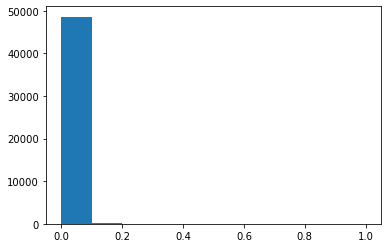

In [113]:
new =list(df['price'])
print(df['price'].mean())
plt.hist(new)


In [114]:
con_one = df['price'] < 100
con_two = df['price'] < 200
con_three = df['price'] >= 200
statements = [con_one, con_two, con_three]
choices = [0,1,2]
df['price_cat'] = np.select(statements, choices)
df[['price_cat', 'price']]

,price_cat,price
0,0,0.0149
1,0,0.0225
2,0,0.0150
3,0,0.0089
4,0,0.0080
...,...,...
48890,0,0.0070
48891,0,0.0040
48892,0,0.0115
48893,0,0.0055


In [128]:
y = df['price_cat']
x = df.drop(['price', 'price_cat'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model = lm_model.fit(x_train, y_train)
y_test_pred = lm_model.predict(x_test)
y_train_pred = lm_model.predict(x_train)

r_score_test = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
r_score_train = r2_score(y_train, y_train_pred)

print([r_score_test, MSE])

[1.0, 0.0]


In [125]:
y = df['price' ]
x = df[['latitude', 'longitude']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model = lm_model.fit(x_train, y_train)
y_test_pred = lm_model.predict(x_test)
y_train_pred = lm_model.predict(x_train)

r_score_test = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
r_score_train = r2_score(y_train, y_train_pred)

print([r_score_test, r_score_train])

[0.031155646465428455, 0.02282252246369909]


In [117]:
corr_matrix = df.corr()
#corr_matrix['price'] = corr_matrix['price'].abs()

In [118]:
corr_matrix.sort_values(by=['price'], ascending = False)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,...,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room,price_cat
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829,-0.041030,-0.098603,...,0.001813,-0.003244,-0.015126,-0.005786,0.010306,-0.019568,0.255857,-0.240246,-0.053613,NaN
Entire home/apt,-0.005712,-0.192143,0.255857,0.074900,-0.010087,-0.037034,0.112193,-0.006804,-0.052092,-0.073905,...,0.004348,0.024177,-0.024850,-0.004685,0.004348,-0.034994,1.000000,-0.953470,-0.162144,NaN
Manhattan,0.590639,-0.433531,0.163976,0.067362,-0.045820,-0.046219,0.152842,-0.005434,-0.134730,-0.745240,...,-0.004033,-0.050617,-0.037869,-0.013378,-0.004033,-0.061977,0.160082,-0.157762,-0.009169,NaN
Midtown,0.085871,-0.092558,0.097781,0.039508,-0.043342,-0.007018,0.049607,0.061651,-0.027289,-0.150944,...,-0.000817,-0.010252,-0.007670,-0.002710,-0.000817,-0.012553,0.069530,-0.066534,-0.010489,NaN
Tribeca,-0.012386,-0.072126,0.084814,0.012780,-0.015942,-0.013463,0.065536,0.006286,-0.009106,-0.050368,...,-0.000273,-0.003421,-0.002559,-0.000904,-0.000273,-0.004189,0.034775,-0.032009,-0.009396,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Queens,0.017145,0.622749,-0.080205,-0.032629,0.035967,0.110831,-0.033881,0.087113,-0.054693,-0.302527,...,-0.001637,-0.020548,0.117287,-0.005431,-0.001637,0.191954,-0.108505,0.100676,0.026693,NaN
Brooklyn,-0.672932,0.017735,-0.098603,-0.039658,0.017414,-0.041083,-0.123234,-0.079671,-0.126239,1.000000,...,-0.003779,0.067921,-0.035482,-0.012535,-0.003779,-0.058071,-0.073905,0.079464,-0.017467,NaN
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731,0.221315,0.017735,...,-0.017637,-0.031750,0.086419,0.027375,-0.024112,0.074448,-0.192143,0.183613,0.029812,NaN
Private room,0.004363,0.183613,-0.240246,-0.073837,0.017253,0.034861,-0.108945,-0.010986,0.042765,0.079464,...,-0.004146,-0.021546,0.025010,0.002676,-0.004146,0.037815,-0.953470,1.000000,-0.142899,NaN


In [127]:
y = df['price' ]
x = df[['longitude', 'Private room', 'Entire home/apt', 'Manhattan']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model = lm_model.fit(x_train, y_train)
y_test_pred = lm_model.predict(x_test)
y_train_pred = lm_model.predict(x_train)

r_score_test = r2_score(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)



print(r_score_test, MSE)

0.11585045702618901 0.00035708419658194384


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)

model_list = []

# model_list.append(LinearRegression().fit(x_train, y_train))
model_list.append(Lasso().fit(x_train, y_train))
model_list.append(Ridge().fit(x_train, y_train))
model_list.append(ElasticNet().fit(x_train, y_train))
#model_list.append(BayesianRidge().fit(x_train, y_train))



answer_dict = {}

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
param_grid = dict(alpha=alpha)

for model in model_list:
    fitted_model = model.fit(x_train, y_train)
    grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring='r2', verbose=1, n_jobs=-1)
    grid_result = grid.fit(x_train, y_train)
    print(model)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.0s finished
/opt/anaconda3/lib/python3.8/site-packages/skl

Lasso()
Best Score:  1.0
Best Params:  {'alpha': 0.001}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ridge()
Best Score:  1.0
Best Params:  {'alpha': 0.001}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
ElasticNet()
Best Score:  1.0
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.6s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [121]:
print(df.dtypes)

latitude             float64
longitude            float64
price                float64
minimum_nights       float64
number_of_reviews    float64
                      ...   
Woodside               uint8
Entire home/apt        uint8
Private room           uint8
Shared room            uint8
price_cat              int64
Length: 238, dtype: object


In [122]:
import tensorflow as tf

tf.keras.backend.set_floatx('float64')

y = df['price_cat' ]
x =  df[['longitude', 'Private room', 'Entire home/apt', 'Manhattan']]


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3 , random_state=42)



#target = df.pop('price')

dataset = tf.data.Dataset.from_tensor_slices((x.values, y.values))

# for feat, targ in dataset.take(5):
#     print ('Features: {}, Target: {}'.format(feat, targ))

#train_dataset = dataset.shuffle(len(df)).batch(1)





def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=([4,]) , activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
      ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.MSE,
                metrics=['accuracy'])
    return model

n_epochs = 25
batch_size = 10
callbacks_list = None
model = get_compiled_model()
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
              epochs=n_epochs, batch_size=batch_size)


Epoch 1/25
3423/3423 [==============================] - 3s 955us/step - loss: 6.2319e-07 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/25
3423/3423 [==============================] - 3s 940us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/25
3423/3423 [==============================] - 3s 912us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/25
3423/3423 [==============================] - 3s 987us/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/25
3423/3423 [==============================] - 4s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/25
3423/3423 [==============================] - 4s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
3423/3423 [==============================] - 4s 1ms/step - loss: 0.00

KeyboardInterrupt: 

TypeError: cannot pickle '_thread.RLock' object

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.11585045702618946 35708.41965819436
